In [66]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 7665.12 MiB, increment: -1.74 MiB


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from tqdm import tqdm
import rasterio
import time
import geopandas

## Reading in the 19 .tif files

In [4]:
start = time.time()

file2019= '/shared_space/srs108/data2019.tif'
data19 = rasterio.open(file2019).read(1)    
file2018 = '/shared_space/srs108/data2018.tif'
data18 = rasterio.open(file2018).read(1)
file2017= '/shared_space/srs108/data2017.tif'
data17 = rasterio.open(file2017).read(1)
file2016 =  '/shared_space/srs108/data2016.tif'
data16 = rasterio.open(file2016).read(1)
file2015= '/shared_space/srs108/data2015.tif'
data15 = rasterio.open(file2015).read(1)
file2014= '/shared_space/srs108/data2014.tif'
data14 = rasterio.open(file2014).read(1)
file2013 = '/shared_space/srs108/data2013.tif'
data13 = rasterio.open(file2013).read(1)
file2012= '/shared_space/srs108/data2012.tif'
data12 = rasterio.open(file2012).read(1)
file2011= '/shared_space/srs108/data2011.tif'
data11 = rasterio.open(file2011).read(1)
file2010= '/shared_space/srs108/data2010.tif'
data10 = rasterio.open(file2010).read(1)
file2009= '/shared_space/srs108/data2009.tif'
data9 = rasterio.open(file2009).read(1)
file2008= '/shared_space/srs108/data2008.tif'
data8 = rasterio.open(file2008).read(1)
file2007= '/shared_space/srs108/data2007.tif'
data7 = rasterio.open(file2007).read(1)
file2006= '/shared_space/srs108/data2006.tif'
data6 = rasterio.open(file2006).read(1)
file2005= '/shared_space/srs108/data2005.tif'
data5 = rasterio.open(file2005).read(1)
file2004= '/shared_space/srs108/data2004.tif'
data4 = rasterio.open(file2004).read(1)
file2003= '/shared_space/srs108/data2003.tif'
data3 = rasterio.open(file2003).read(1)
file2002= '/shared_space/srs108/data2002.tif'
data2 = rasterio.open(file2002).read(1)
file2001= '/shared_space/srs108/data2001.tif'
data1 = rasterio.open(file2001).read(1)

end=time.time()

print('read in %0.2f'%(end-start),'seconds')

read in 17.41 seconds


### Looking at what the raster files look like

In [195]:
%%bash
gdalinfo -stats -proj4 /shared_space/srs108/data2016.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/srs108/data2016.tif
Size is 7200, 3600
Coordinate System is:
GEOGCS["Unknown datum based upon the Clarke 1866 ellipsoid",
    DATUM["Not_specified_based_on_Clarke_1866_spheroid",
        SPHEROID["Clarke 1866",6378206.4,294.9786982138982,
            AUTHORITY["EPSG","7008"]]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]
PROJ.4 string is:
'+proj=longlat +ellps=clrk66 +no_defs '
Origin = (-180.000000000000000,90.000000000000000)
Pixel Size = (0.050000000000000,-0.050000000000000)
Metadata:
  ALGORITHMPACKAGEACCEPTANCEDATE=2001-01-01
  ALGORITHMPACKAGEMATURITYCODE=LAUNCH
  ALGORITHMPACKAGENAME=MOD12C1
  ALGORITHMPACKAGEVERSION=V2.0
  AREA_OR_POINT=Area
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDINSTRUMENTSHORTNAME.2=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=Terra
  ASSOCIATEDPLATFORMSHORTNAME.2=Aqua
  ASSOCIATEDSENSORSHORTNAME.1=MODIS
  ASSOCIATEDSENSORSHORTNAME.2=MODIS
  AUTOMATICQUALITYFLAG.1=Passed
  AUTOMATICQUALIT

pj_obj_create: Open of /opt/conda/share/proj failed


# Creating masks over the 19 years for each respective classification type

In [6]:
#evergreen needleleaf (EN)
EN19 = data19 == 1
EN18 = data18 == 1
EN17 = data17 == 1
EN16 = data16 == 1
EN15 = data15 == 1
EN14 = data14 == 1
EN13 = data13 == 1
EN12 = data12 == 1
EN11 = data11 == 1
EN10 = data10 == 1
EN9 = data9 == 1
EN8 = data8 == 1
EN7 = data7 == 1
EN6 = data6 == 1
EN5 = data5 == 1
EN4 = data4 == 1
EN3 = data3 == 1
EN2 = data2 == 1
EN1 = data1 == 1

#evergreen broadleaf (EB)
EB19 = data19 == 2
EB18 = data18 == 2
EB17 = data17 == 2
EB16 = data16 == 2
EB15 = data15 == 2
EB14 = data14 == 2
EB13 = data13 == 2
EB12 = data12 == 2
EB11 = data11 == 2
EB10 = data10 == 2
EB9 = data9 == 2
EB8 = data8 == 2
EB7 = data7 == 2
EB6 = data6 == 2
EB5 = data5 == 2
EB4 = data4 == 2
EB3 = data3 == 2
EB2 = data2 == 2
EB1 = data1 == 2

#deciduous needleleaf (DN)
DN19 = data19 == 3
DN18 = data18 == 3
DN17 = data17 == 3
DN16 = data16 == 3
DN15 = data15 == 3
DN14 = data14 == 3
DN13 = data13 == 3
DN12 = data12 == 3
DN11 = data11 == 3
DN10 = data10 == 3
DN9 = data9 == 3
DN8 = data8 == 3
DN7 = data7 == 3
DN6 = data6 == 3
DN5 = data5 == 3
DN4 = data4 == 3
DN3 = data3 == 3
DN2 = data2 == 3
DN1 = data1 == 3

#deciduous broadleaf (DB)
DB19 = data19 == 4
DB18 = data18 == 4
DB17 = data17 == 4
DB16 = data16 == 4
DB15 = data15 == 4
DB14 = data14 == 4
DB13 = data13 == 4
DB12 = data12 == 4
DB11 = data11 == 4
DB10 = data10 == 4
DB9 = data9 == 4
DB8 = data8 == 4
DB7 = data7 == 4
DB6 = data6 == 4
DB5 = data5 == 4
DB4 = data4 == 4
DB3 = data3 == 4
DB2 = data2 == 4
DB1 = data1 == 4

#mixed forests (MF)
MF19 = data19 == 5
MF18 = data18 == 5
MF17 = data17 == 5
MF16 = data16 == 5
MF15 = data15 == 5
MF14 = data14 == 5
MF13 = data13 == 5
MF12 = data12 == 5
MF11 = data11 == 5
MF10 = data10 == 5
MF9 = data9 == 5
MF8 = data8 == 5
MF7 = data7 == 5
MF6 = data6 == 5
MF5 = data5 == 5
MF4 = data4 == 5
MF3 = data3 == 5
MF2 = data2 == 5
MF1 = data1 == 5

#cropland (CL)
CL19 = data19 == 12
CL18 = data18 == 12
CL17 = data17 == 12
CL16 = data16 == 12
CL15 = data15 == 12
CL14 = data14 == 12
CL13 = data13 == 12
CL12 = data12 == 12
CL11 = data11 == 12
CL10 = data10 == 12
CL9 = data9 == 12
CL8 = data8 == 12
CL7 = data7 == 12
CL6 = data6 == 12
CL5 = data5 == 12
CL4 = data4 == 12
CL3 = data3 == 12
CL2 = data2 == 12
CL1 = data1 == 12

#urbandland (UL)
UL19 = data19 == 13
UL18 = data18 == 13
UL17 = data17 == 13
UL16 = data16 == 13
UL15 = data15 == 13
UL14 = data14 == 13
UL13 = data13 == 13
UL12 = data12 == 13
UL11 = data11 == 13
UL10 = data10 == 13
UL9 = data9 == 13
UL8 = data8 == 13
UL7 = data7 == 13
UL6 = data6 == 13
UL5 = data5 == 13
UL4 = data4 == 13
UL3 = data3 == 13
UL2 = data2 == 13
UL1 = data1 == 13

#natural vegitation
NV19 = data19 == 14
NV18 = data18 == 14
NV17 = data17 == 14
NV16 = data16 == 14
NV15 = data15 == 14
NV14 = data14 == 14
NV13 = data13 == 14
NV12 = data12 == 14
NV11 = data11 == 14
NV10 = data10 == 14
NV9 = data9 == 14
NV8 = data8 == 14
NV7 = data7 == 14
NV6 = data6 == 14
NV5 = data5 == 14
NV4 = data4 == 14
NV3 = data3 == 14
NV2 = data2 == 14
NV1 = data1 == 14

#woody savanna
WS19 = data19 == 8
WS18 = data18 == 8
WS17 = data17 == 8
WS16 = data16 == 8
WS15 = data15 == 8
WS14 = data14 == 8
WS13 = data13 == 8
WS12 = data12 == 8
WS11 = data11 == 8
WS10 = data10 == 8
WS9 = data9 == 8
WS8 = data8 == 8
WS7 = data7 == 8
WS6 = data6 == 8
WS5 = data5 == 8
WS4 = data4 == 8
WS3 = data3 == 8
WS2 = data2 == 8
WS1 = data1 == 8

#closed shrubland
CS19 = data19 == 6
CS18 = data18 == 6
CS17 = data17 == 6
CS16 = data16 == 6
CS15 = data15 == 6
CS14 = data14 == 6
CS13 = data13 == 6
CS12 = data12 == 6
CS11 = data11 == 6
CS10 = data10 == 6
CS9 = data9 == 6
CS8 = data8 == 6
CS7 = data7 == 6
CS6 = data6 == 6
CS5 = data5 == 6
CS4 = data4 == 6
CS3 = data3 == 6
CS2 = data2 == 6
CS1 = data1 == 6

#open shrubland
OS19 = data19 == 7
OS18 = data18 == 7
OS17 = data17 == 7
OS16 = data16 == 7
OS15 = data15 == 7
OS14 = data14 == 7
OS13 = data13 == 7
OS12 = data12 == 7
OS11 = data11 == 7
OS10 = data10 == 7
OS9 = data9 == 7
OS8 = data8 == 7
OS7 = data7 == 7
OS6 = data6 == 7
OS5 = data5 == 7
OS4 = data4 == 7
OS3 = data3 == 7
OS2 = data2 == 7
OS1 = data1 == 7

#savannas
S19 = data19 == 9
S18 = data18 == 9
S17 = data17 == 9
S16 = data16 == 9
S15 = data15 == 9
S14 = data14 == 9
S13 = data13 == 9
S12 = data12 == 9
S11 = data11 == 9
S10 = data10 == 9
S9 = data9 == 9
S8 = data8 == 9
S7 = data7 == 9
S6 = data6 == 9
S5 = data5 == 9
S4 = data4 == 9
S3 = data3 == 9
S2 = data2 == 9
S1 = data1 == 9

#grasslands
GL19 = data19 == 10
GL18 = data18 == 10
GL17 = data17 == 10
GL16 = data16 == 10
GL15 = data15 == 10
GL14 = data14 == 10
GL13 = data13 == 10
GL12 = data12 == 10
GL11 = data11 == 10
GL10 = data10 == 10
GL9 = data9 == 10
GL8 = data8 == 10
GL7 = data7 == 10
GL6 = data6 == 10
GL5 = data5 == 10
GL4 = data4 == 10
GL3 = data3 == 10
GL2 = data2 == 10
GL1 = data1 == 10

#permanent wetland
PW19 = data19 == 11
PW18 = data18 == 11
PW17 = data17 == 11
PW16 = data16 == 11
PW15 = data15 == 11
PW14 = data14 == 11
PW13 = data13 == 11
PW12 = data12 == 11
PW11 = data11 == 11
PW10 = data10 == 11
PW9 = data9 == 11
PW8 = data8 == 11
PW7 = data7 == 11
PW6 = data6 == 11
PW5 = data5 == 11
PW4 = data4 == 11
PW3 = data3 == 11
PW2 = data2 == 11
PW1 = data1 == 11

## Quick plots of the 2019 data, and plot of difference between broadleaf and needleleaf locations

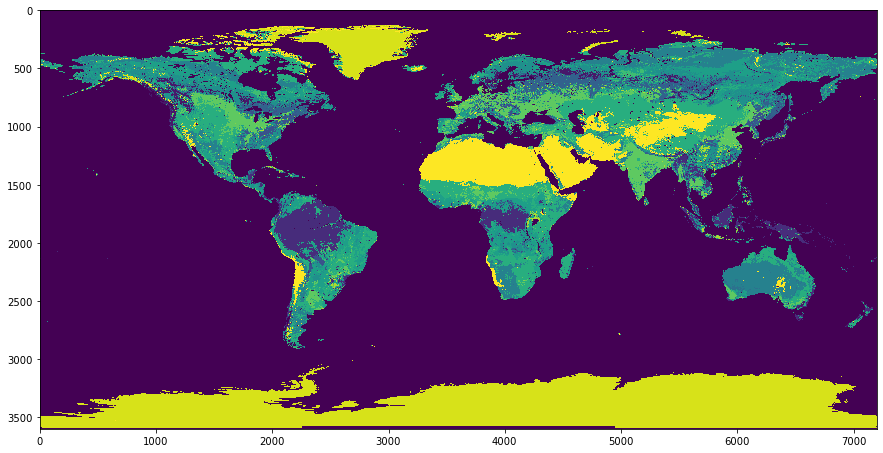

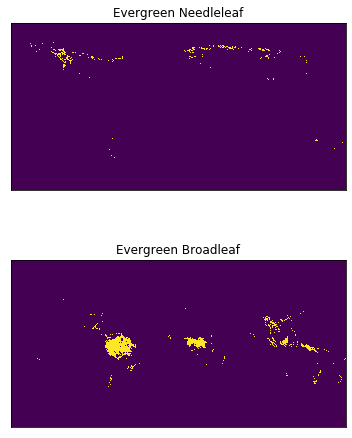

In [89]:
plt.figure(figsize=(15,15))
plt.imshow(data19)

plt.figure(figsize=(6,8))
plt.subplot(211)
plt.imshow(EN19)
plt.title('Evergreen Needleleaf')
plt.xticks([])
plt.yticks([])
plt.subplot(212)
plt.title('Evergreen Broadleaf')
plt.imshow(EB19)
plt.xticks([])
plt.yticks([])
plt.show()


## Creating surface area function for later use when finding measured differences between years and classifications

In [16]:
def surface_area(Re,phi_a,phi_b,lambda_c,lambda_d):
    #Convert to radians
    phi_a = phi_a*np.pi/180.0
    phi_b = phi_b*np.pi/180.0
    lambda_c = lambda_c*np.pi/180.0
    lambda_d = lambda_d*np.pi/180.0
    #Calculate surface area
    return Re**2*np.abs(np.sin(phi_a)-np.sin(phi_b))*np.abs(lambda_c - lambda_d)

lamda = np.linspace(-180,180,7200) #1d array for lon
phi = np.linspace(-90,90, 3600) #1d array for lat
phi_a = phi - (phi[1]-phi[0])/2
phi_b = phi + (phi[1]-phi[0])/2

#print(lamda)
#Lets' define the function to calculate the surface area of quadrilateral on the earth's surface
R=6371
res = lamda[1] - lamda[0]

area = np.zeros((phi.shape[0],lamda.shape[0]))
#print(res)

for i in tqdm(range(area.shape[1]),position=0, leave=True):
    lambda_c = lamda[i] - res/2
    lambda_d = lamda[i] + res/2
    #print(i)
    #tmp = surface_area(R,phi_a,phi_b,lambda_c,lambda_d)
    area[:,i] = surface_area(R,phi_a,phi_b,lambda_c,lambda_d)   

100%|██████████| 7200/7200 [00:01<00:00, 4513.90it/s]


# Define Shapefile and Look Inside

In [9]:
import geopandas as gpd
shapefile = gpd.read_file("World_Countries__Generalized_.shp")
#print(shapefile)

     FID                                   COUNTRY ISO           COUNTRYAFF  \
0      1                            American Samoa  AS        United States   
1      2      United States Minor Outlying Islands  UM        United States   
2      3                              Cook Islands  CK          New Zealand   
3      4                          French Polynesia  PF               France   
4      5                                      Niue  NU          New Zealand   
5      6                                  Pitcairn  PN       United Kingdom   
6      7                                     Samoa  WS                Samoa   
7      8                                   Tokelau  TK          New Zealand   
8      9                                     Tonga  TO                Tonga   
9     10                         Wallis and Futuna  WF               France   
10    11                               El Salvador  SV          El Salvador   
11    12                                 Guatemala  

## Handling of shapefile into comparable .TIF file

In [10]:
%%bash
ogrinfo -so ./World_Countries__Generalized_.shp World_Countries__Generalized_

INFO: Open of `./World_Countries__Generalized_.shp'
      using driver `ESRI Shapefile' successful.

Layer name: World_Countries__Generalized_
Metadata:
  DBF_DATE_LAST_UPDATE=2020-08-19
Geometry: Polygon
Feature Count: 249
Extent: (-179.999989, -89.000000) - (179.999989, 83.623600)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
FID: Integer (3.0)
COUNTRY: String (40.0)
ISO: String (2.0)
COUNTRYAFF: String (32.0)
AFF_ISO: String (2.0)
SHAPE_Leng: Real (24.15)
SHAPE_Area: Real (24.15)


In [11]:
%%bash
gdal_rasterize -l World_Countries__Generalized_ -a FID -te -180 -90 180 90 -tr 0.05 0.05 World_Countries__Generalized_.shp FID.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [10]:
shapefile= 'FID.tif'
shapedata = rasterio.open(shapefile).read(1)    

## Creating lists of all masks. 
19 components in each of 14 masks

In [11]:
EB_mask = [EB1, EB2, EB3, EB4, EB5, EB6, EB7, EB8, EB9, EB10,   #1
          EB11, EB12, EB13, EB14, EB15, EB16, EB17, EB18, EB19, ]

EN_mask = [EN1, EN2, EN3, EN4, EN5, EN6, EN7, EN8, EN9, EN10,   #2
          EN11, EN12, EN13, EN14, EN15, EN16, EN17, EN18, EN19]

DN_mask = [DN1, DN2, DN3, DN4, DN5, DN6, DN7, DN8, DN9, DN10,   #3
          DN11, DN12, DN13, DN14, DN15, DN16, DN17, DN18, DN19]

DB_mask = [DB1, DB2, DB3, DB4, DB5, DB6, DB7, DB8, DB9, DB10,   #4
          DB11, DB12, DB13, DB14, DB15, DB16, DB17, DB18, DB19]

MF_mask = [MF1, MF2, MF3, MF4, MF5, MF6, MF7, MF8, MF9, MF10,   #5
          MF11, MF12, MF13, MF14, MF15, MF16, MF17, MF18, MF19]

CS_mask =[CS1, CS2, CS3, CS4, CS5, CS6 ,CS7, CS8, CS9, CS10,    #6
         CS11, CS12, CS13, CS14, CS15, CS16, CS17, CS18, CS19]

OS_mask =[OS1, OS2, OS3, OS4, OS5, OS6 ,OS7, OS8, OS9, OS10,    #7
         OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19]

WS_mask =[WS1, WS2, WS3, WS4, WS5, WS6 ,WS7, WS8, WS9, WS10,   #8
         WS11, WS12, WS13, WS14, WS15, WS16, WS17, WS18, WS19]

S_mask =[S1, S2, S3, S4, S5, S6 ,S7, S8, S9, S10,           #9
         S11, S12, S13, S14, S15, S16, S17, S18, S19]

GL_mask =[GL1, GL2, GL3, GL4, GL5, GL6 ,GL7, GL8, GL9, GL10,  #10
         GL11, GL12, GL13, GL14, GL15, GL16, GL17, GL18, GL19]


PW_mask =[PW1, PW2, PW3, PW4, PW5, PW6 ,PW7, PW8, PW9, PW10,   #11
         PW11, PW12, PW13, PW14, PW15, PW16, PW17, PW18, PW19]


CL_mask = [CL1, CL2, CL3, CL4, CL5, CL6, CL7, CL8, CL9, CL10, #12
          CL11, CL12, CL13, CL14, CL15, CL16, CL17, CL18, CL19]

UL_mask = [UL1, UL2, UL3, UL4, UL5, UL6, UL7, UL8, UL9, UL10,   #13
          UL11, UL12, UL13, UL14, UL15, UL16, UL17, UL18, UL19]

NV_mask = [NV1, NV2, NV3, NV4, NV5, NV6, NV7, NV8, NV9, NV10,    #14
          NV11, NV12, NV13, NV14, NV15, NV16, NV17, NV18, NV19]

## Find ID for any country in the world

In [319]:
%%html
<iframe width="939" height="528" src="https://hub.arcgis.com/datasets/2b93b06dc0dc4e809d3c8db5cb96ba69_0/data?orderBy=COUNTRY&page=1" frameborder="0" allow"accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

# Brazil

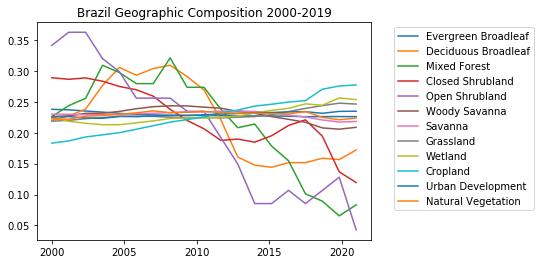

In [24]:
#Brazil

#definition for pixel from shapefile key
m_brazil = shapedata== 21

#sum of pixels that contirbute to the classifications defined earlier in relation to the pixels that equal to brazil.

eb_brazil =[]
for x in EB_mask:                 #19 components in EB_mask for the 19 years studied
    tmp=np.sum(x[m_brazil])       #summing up the pixels that fall into the EB classificaiotn masked in brazil
    eb_brazil.append(tmp)         #attaching to a list for all 19 years
    
en_brazil =[]
for x in EN_mask:
    tmp=np.sum(x[m_brazil])
    en_brazil.append(tmp)

dn_brazil =[]
for x in DN_mask:
    tmp=np.sum(x[m_brazil])
    dn_brazil.append(tmp)
    
db_brazil =[]
for x in DB_mask:
    tmp=np.sum(x[m_brazil])
    db_brazil.append(tmp)
#print(db_brazil)

mf_brazil =[]
for x in MF_mask:
    tmp=np.sum(x[m_brazil])
    mf_brazil.append(tmp)
    
cs_brazil =[]
for x in CS_mask:
    tmp=np.sum(x[m_brazil])
    cs_brazil.append(tmp)
    
os_brazil =[]
for x in OS_mask:
    tmp=np.sum(x[m_brazil])
    os_brazil.append(tmp)
    
ws_brazil =[]   
for x in WS_mask:
    tmp=np.sum(x[m_brazil])
    ws_brazil.append(tmp)
    
s_brazil =[]
for x in S_mask:
    tmp=np.sum(x[m_brazil])
    s_brazil.append(tmp)
    
    
gl_brazil =[]
for x in GL_mask:
    tmp=np.sum(x[m_brazil])
    gl_brazil.append(tmp)

    
pw_brazil =[]
for x in PW_mask:
    tmp=np.sum(x[m_brazil])
    pw_brazil.append(tmp)
        
    
cl_brazil = []
for x in CL_mask:    
    tmp=np.sum(x[m_brazil])
    cl_brazil.append(tmp)
    
ul_brazil=[]
for x in UL_mask:    
    tmp=np.sum(x[m_brazil])
    ul_brazil.append(tmp)
    
nv_brazil = []
for x in NV_mask:
    tmp=np.sum(x[m_brazil])
    nv_brazil.append(tmp)
        
all_brazil = np.concatenate((en_brazil, eb_brazil, dn_brazil, db_brazil, mf_brazil, cs_brazil, os_brazil, ws_brazil,
                            s_brazil, gl_brazil, pw_brazil, cl_brazil, ul_brazil, nv_brazil))    
    
#proportion ratio  (* by 100 for percent) 
en_brazil_per = en_brazil/(np.sum(m_brazil))
eb_brazil_per = eb_brazil/(np.sum(m_brazil))
dn_brazil_per = dn_brazil/(np.sum(m_brazil))
db_brazil_per = db_brazil/(np.sum(m_brazil))
mf_brazil_per = mf_brazil/(np.sum(m_brazil))
cs_brazil_per = cs_brazil/(np.sum(m_brazil))
os_brazil_per = os_brazil/(np.sum(m_brazil))
ws_brazil_per = ws_brazil/(np.sum(m_brazil))
s_brazil_per = s_brazil/(np.sum(m_brazil))
gl_brazil_per = gl_brazil/(np.sum(m_brazil))
pw_brazil_per = pw_brazil/(np.sum(m_brazil))
cl_brazil_per = cl_brazil/(np.sum(m_brazil))
ul_brazil_per= ul_brazil/(np.sum(m_brazil))
nv_brazil_per = nv_brazil/(np.sum(m_brazil))


#normalization
from sklearn import preprocessing
brazil_percents = [eb_brazil_per, en_brazil_per, dn_brazil_per, db_brazil_per, mf_brazil_per, cs_brazil_per, os_brazil_per,
                  ws_brazil_per, s_brazil_per, gl_brazil_per, pw_brazil_per, cl_brazil_per, ul_brazil_per, nv_brazil_per]
brazil_norms = []
for i in brazil_percents:
    i = i.reshape(-1,1)
    i = preprocessing.normalize(i,axis = 0)
    brazil_norms.append(i)

#plotting of normalized classifications on same scale    
x=np.linspace(2000,2021,19)
plt.plot(x, brazil_norms[0],label='Evergreen Broadleaf')
#plt.plot(x, brazil_norms[1], label = 'Evergreen Needleleaf') #removed because only noise because no needleaf south of equator
#plt.plot(x, brazil_norms[2], label = 'Deciduous Needleleaf')
plt.plot(x, brazil_norms[3], label = 'Deciduous Broadleaf')
plt.plot(x, brazil_norms[4], label = 'Mixed Forest')
plt.plot(x, brazil_norms[5], label = 'Closed Shrubland')
plt.plot(x, brazil_norms[6], label = 'Open Shrubland')
plt.plot(x, brazil_norms[7], label = 'Woody Savanna')
plt.plot(x, brazil_norms[8], label = 'Savanna')
plt.plot(x, brazil_norms[9], label = 'Grassland')
plt.plot(x, brazil_norms[10], label = 'Wetland')
plt.plot(x, brazil_norms[11], label='Cropland')
plt.plot(x,brazil_norms[12], label = 'Urban Development')
plt.plot(x,brazil_norms[13], label = 'Natural Vegetation')
plt.title('Brazil Geographic Composition 2000-2019')
plt.legend(loc='upper right',bbox_to_anchor= (1.5,1))
plt.show()

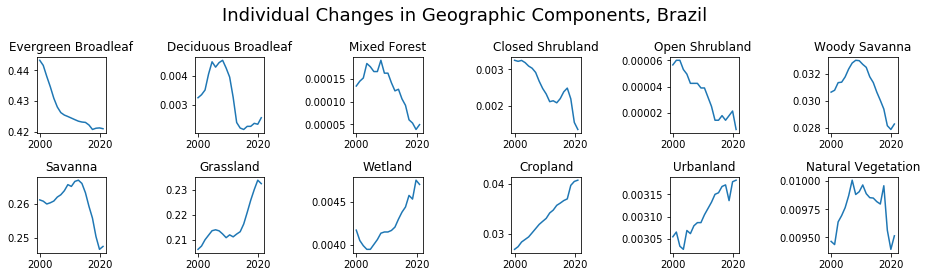

In [14]:
#individual plots with respective land cover ratios to Brazil
x=np.linspace(2000,2021,19)
plt.figure(figsize=(13,4))
plt.subplots_adjust(hspace=0.6, wspace=0.99)
plt.suptitle('Individual Changes in Geographic Components, Brazil',fontsize=18)

plt.subplot(261)
plt.plot(x, eb_brazil_per)
plt.title('Evergreen Broadleaf')
plt.subplot(262)
plt.plot(x, db_brazil_per)
plt.title('Deciduous Broadleaf')
plt.subplot(263)
plt.plot(x, mf_brazil_per)
plt.title('Mixed Forest')
plt.subplot(264)
plt.plot(x, cs_brazil_per)
plt.title('Closed Shrubland')
plt.subplot(265)
plt.plot(x, os_brazil_per)
plt.title('Open Shrubland ')
plt.subplot(266)
plt.plot(x, ws_brazil_per)
plt.title('Woody Savanna')
plt.subplot(267)
plt.plot(x, s_brazil_per)
plt.title('Savanna')
plt.subplot(268)
plt.plot(x, gl_brazil_per)
plt.title('Grassland')
plt.subplot(269)
plt.plot(x, pw_brazil_per)
plt.title('Wetland')
plt.subplot(2,6,10)
plt.plot(x, cl_brazil_per)
plt.title('Cropland')
plt.subplot(2,6,11)
plt.plot(x, ul_brazil_per)
plt.title('Urbanland')
plt.subplot(2,6,12)
plt.plot(x, nv_brazil_per)
plt.title('Natural Vegetation')
plt.tight_layout(rect=[0, 0.03, 1, .9])

plt.show()

In [26]:
#finding difference between first year of study and last year of study
brazil_SA_km=np.sum(area[m_brazil])


class_types = ['evergreen broadleaf', 'evergreen needleleaf','deciduous needleleaf' ,  'deciduous broadleaf',
               'mixed forest', 'closed shrubland', 'open shrubland', 'woody savanna', 'savanna',
               'grasslands', 'wetlands', 'croplands', 'urbanland', 'natrual vegetation']
brazil_change =[]

#difference between 2000 and 2019 for all land cover types in km^2
for k in brazil_percents:
    change = (k[-1] - k[0])* brazil_SA_km
    brazil_change.append(change)

#print(brazil_change)

for i in range(0,14):
     print("Total difference for",class_types[i], ':%0.2f' %brazil_change[i], 'squared km' )


Total difference for evergreen broadleaf :-189010.69 squared km
Total difference for evergreen needleleaf :0.00 squared km
Total difference for deciduous needleleaf :0.00 squared km
Total difference for deciduous broadleaf :-5986.49 squared km
Total difference for mixed forest :-721.99 squared km
Total difference for closed shrubland :-16244.75 squared km
Total difference for open shrubland :-421.16 squared km
Total difference for woody savanna :-20125.44 squared km
Total difference for savanna :-116721.55 squared km
Total difference for grasslands :222553.10 squared km
Total difference for wetlands :4512.43 squared km
Total difference for croplands :117864.70 squared km
Total difference for urbanland :1082.98 squared km
Total difference for natrual vegetation :421.16 squared km


In [43]:
#used this cell block for finding percentage of land cover, or actual measure of land cover
print(eb_brazil_per[0]*brazil_SA_km)        #amount of amazon rainforest in 2000
print(189010/19)                            #rate at which evergreen broadleafs are disappearing 
print(db_brazil_per[0], db_brazil_per[-1])  #deciduous first and last values for percent change
print(cl_brazil_per[-1]-cl_brazil_per[0])   #cropland percent change
print(ul_brazil_per[-1]-ul_brazil_per[0])   #urbanalnd percent change


3771580.1125620133
9947.894736842105
0.003242184461556956 0.002538591541328129
0.013852648550032882
0.00012728314134792832


# Nigeria

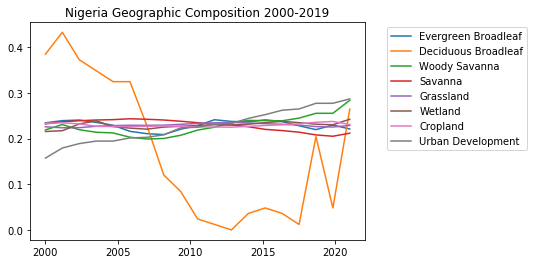

In [44]:
#Nigeria
m_n = shapedata== 135

eb_n =[]
for x in EB_mask:
    tmp=np.sum(x[m_n])
    eb_n.append(tmp)
    
en_n =[]
for x in EN_mask:
    tmp=np.sum(x[m_n])
    en_n.append(tmp)

dn_n =[]
for x in DN_mask:
    tmp=np.sum(x[m_n])
    dn_n.append(tmp)
    
db_n =[]
for x in DB_mask:
    tmp=np.sum(x[m_n])
    db_n.append(tmp)
    
mf_n =[]
for x in MF_mask:
    tmp=np.sum(x[m_n])
    mf_n.append(tmp)
    
cs_n =[]
for x in CS_mask:
    tmp=np.sum(x[m_n])
    cs_n.append(tmp)
    
os_n =[]
for x in OS_mask:
    tmp=np.sum(x[m_n])
    os_n.append(tmp)
    
ws_n =[]   
for x in WS_mask:
    tmp=np.sum(x[m_n])
    ws_n.append(tmp)
    
s_n =[]
for x in S_mask:
    tmp=np.sum(x[m_n])
    s_n.append(tmp)
    
    
gl_n =[]
for x in GL_mask:
    tmp=np.sum(x[m_n])
    gl_n.append(tmp)

    
    
pw_n =[]
for x in PW_mask:
    tmp=np.sum(x[m_n])
    pw_n.append(tmp)
        
    
cl_n = []
for x in CL_mask:    
    tmp=np.sum(x[m_n])
    cl_n.append(tmp)
    
ul_n=[]
for x in UL_mask:    
    tmp=np.sum(x[m_n])
    ul_n.append(tmp)
    
nv_n = []
for x in NV_mask:
    tmp=np.sum(x[m_n])
    nv_n.append(tmp)
    
#percent ratio  
en_n_per = en_n/(np.sum(m_n))
eb_n_per = eb_n/(np.sum(m_n))
dn_n_per = dn_n/(np.sum(m_n))
db_n_per = db_n/(np.sum(m_n))
mf_n_per = mf_n/(np.sum(m_n))
cs_n_per = cs_n/(np.sum(m_n))
os_n_per = os_n/(np.sum(m_n))
ws_n_per = ws_n/(np.sum(m_n))
s_n_per = s_n/(np.sum(m_n))
gl_n_per = gl_n/(np.sum(m_n))
pw_n_per = pw_n/(np.sum(m_n))
cl_n_per = cl_n/(np.sum(m_n))
ul_n_per= ul_n/(np.sum(m_n))
nv_n_per = nv_n/(np.sum(m_n))

from sklearn import preprocessing
n_percents = [eb_n_per, en_n_per, dn_n_per, db_n_per, mf_n_per, cs_n_per, os_n_per,
                  ws_n_per, s_n_per, gl_n_per, pw_n_per, cl_n_per, ul_n_per, nv_n_per]
n_norms = []
for i in n_percents:
    i = i.reshape(-1,1)
    i = preprocessing.normalize(i,axis = 0)
    n_norms.append(i)
    
x=np.linspace(2000,2021,19)
plt.plot(x, n_norms[0],label='Evergreen Broadleaf')
#plt.plot(x, n_norms[1], label = 'Evergreen Needleleaf')
#plt.plot(x, n_norms[2], label = 'Deciduous Needleleaf')
plt.plot(x, n_norms[3], label = 'Deciduous Broadleaf')
#plt.plot(x, n_norms[4], label = 'Mixed Forest')
#plt.plot(x, n_norms[5], label = 'Closed Shrubland')
#plt.plot(x, n_norms[6], label = 'Open Shrubland')
plt.plot(x, n_norms[7], label = 'Woody Savanna')
plt.plot(x, n_norms[8], label = 'Savanna')
plt.plot(x, n_norms[9], label = 'Grassland')
plt.plot(x, n_norms[10], label = 'Wetland')
plt.plot(x, n_norms[11], label='Cropland')
plt.plot(x,n_norms[12], label = 'Urban Development')
plt.title('Nigeria Geographic Composition 2000-2019')
plt.legend(loc='upper right',bbox_to_anchor= (1.5,1))
plt.show()


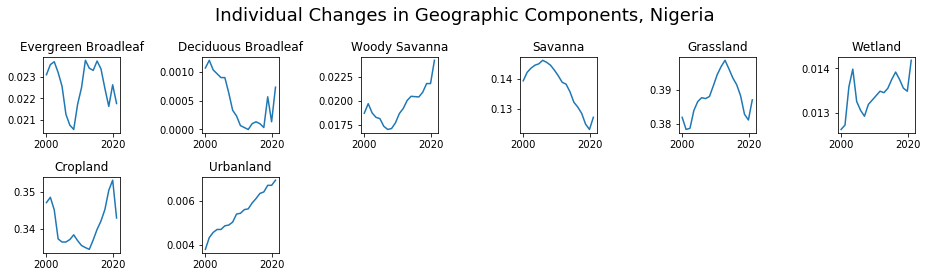

In [45]:
x=np.linspace(2000,2021,19)
plt.figure(figsize=(13,4))
plt.subplots_adjust(hspace=0.6, wspace=0.99)
plt.suptitle('Individual Changes in Geographic Components, Nigeria',fontsize=18)

plt.subplot(261)
plt.plot(x, eb_n_per)
plt.title('Evergreen Broadleaf')
plt.subplot(262)
plt.plot(x, db_n_per)
plt.title('Deciduous Broadleaf')
plt.subplot(263)
plt.plot(x, ws_n_per)
plt.title('Woody Savanna')
plt.subplot(264)
plt.plot(x, s_n_per)
plt.title('Savanna')
plt.subplot(265)
plt.plot(x, gl_n_per)
plt.title('Grassland')
plt.subplot(266)
plt.plot(x, pw_n_per)
plt.title('Wetland')
plt.subplot(267)
plt.plot(x, cl_n_per)
plt.title('Cropland')
plt.subplot(268)
plt.plot(x, ul_n_per)
plt.title('Urbanland')
plt.tight_layout(rect=[0, 0.03, 1, .9])

plt.show()


In [49]:
n_SA_km=np.sum(area[m_n])


class_types = ['evergreen broadleaf', 'evergreen needleleaf','deciduous needleleaf' ,  'deciduous broadleaf',
               'mixed forest', 'closed shrubland', 'open shrubland', 'woody savanna', 'savanna',
               'grasslands', 'wetlands', 'croplands', 'urbanland', 'natrual vegetation']
n_change =[]

#difference between 2000 and 2019 for all land cover types in km^2
for k in n_percents:
    change = (k[-1] - k[0])* n_SA_km
    n_change.append(change)

#print(brazil_change)
    

for i in range(0,14):
     print("Total difference for",class_types[i], ':%0.2f' %n_change[i], 'squared km' )

Total difference for evergreen broadleaf :-1218.65 squared km
Total difference for evergreen needleleaf :0.00 squared km
Total difference for deciduous needleleaf :0.00 squared km
Total difference for deciduous broadleaf :-304.66 squared km
Total difference for mixed forest :-60.93 squared km
Total difference for closed shrubland :0.00 squared km
Total difference for open shrubland :0.00 squared km
Total difference for woody savanna :5057.39 squared km
Total difference for savanna :-11089.69 squared km
Total difference for grasslands :4661.33 squared km
Total difference for wetlands :1431.91 squared km
Total difference for croplands :-3777.81 squared km
Total difference for urbanland :2863.82 squared km
Total difference for natrual vegetation :2711.49 squared km


In [62]:
#change in urbanland in relation to total Surface area
print(2863.82/n_SA_km)

#finding nigeria's highest proportion of grassland
print(gl_n_per[-1]*n_SA_km)

#accumulated ratio of broadleaf forests as of 2019
print(eb_n_per[-1]+ db_n_per[-1])



cropchange = (cl_n_per[-1]-cl_n_per[0])
print(cropchange)                           #net change in cropland over total study period

print(min(cl_n_per))                        #lowest cropland proportion over study period
print(max(cl_n_per)*n_SA_km)                # highest cropland measurement during study period

0.0031375143460837065
353225.04120570415
0.022496662216288384
-0.004138851802403198
0.33451268357810415
322332.3215418622


# Indonesia

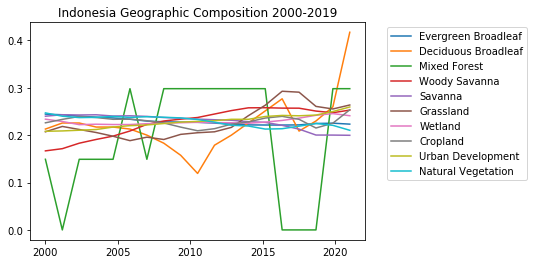

In [67]:
#Indonesia

#definition of shape file
m_ind = shapedata== 216

#sum of pixels that contirbute to the classifications defined earlier in relation to the pixels that equal to indonesia.

eb_ind =[]
for x in EB_mask:
    tmp=np.sum(x[m_ind])
    eb_ind.append(tmp)
    
en_ind =[]
for x in EN_mask:
    tmp=np.sum(x[m_ind])
    en_ind.append(tmp)

dn_ind =[]
for x in DN_mask:
    tmp=np.sum(x[m_ind])
    dn_ind.append(tmp)
    
db_ind =[]
for x in DB_mask:
    tmp=np.sum(x[m_ind])
    db_ind.append(tmp)
    
mf_ind =[]
for x in MF_mask:
    tmp=np.sum(x[m_ind])
    mf_ind.append(tmp)
    
cs_ind =[]
for x in CS_mask:
    tmp=np.sum(x[m_ind])
    cs_ind.append(tmp)
    
os_ind =[]
for x in OS_mask:
    tmp=np.sum(x[m_ind])
    os_ind.append(tmp)
    
ws_ind =[]   
for x in WS_mask:
    tmp=np.sum(x[m_ind])
    ws_ind.append(tmp)
    
s_ind =[]
for x in S_mask:
    tmp=np.sum(x[m_ind])
    s_ind.append(tmp)
    
    
gl_ind =[]
for x in GL_mask:
    tmp=np.sum(x[m_ind])
    gl_ind.append(tmp)

    
    
pw_ind =[]
for x in PW_mask:
    tmp=np.sum(x[m_ind])
    pw_ind.append(tmp)
        
    
cl_ind = []
for x in CL_mask:    
    tmp=np.sum(x[m_ind])
    cl_ind.append(tmp)
    
ul_ind=[]
for x in UL_mask:    
    tmp=np.sum(x[m_ind])
    ul_ind.append(tmp)
    
nv_ind = []
for x in NV_mask:
    tmp=np.sum(x[m_ind])
    nv_ind.append(tmp)
        
    
#percent ratio  
en_ind_per = en_ind/(np.sum(m_ind))
eb_ind_per = eb_ind/(np.sum(m_ind))
dn_ind_per = dn_ind/(np.sum(m_ind))
db_ind_per = db_ind/(np.sum(m_ind))
mf_ind_per = mf_ind/(np.sum(m_ind))
cs_ind_per = cs_ind/(np.sum(m_ind))
os_ind_per = os_ind/(np.sum(m_ind))
ws_ind_per = ws_ind/(np.sum(m_ind))
s_ind_per = s_ind/(np.sum(m_ind))
gl_ind_per = gl_ind/(np.sum(m_ind))
pw_ind_per = pw_ind/(np.sum(m_ind))
cl_ind_per = cl_ind/(np.sum(m_ind))
ul_ind_per= ul_ind/(np.sum(m_ind))
nv_ind_per = nv_ind/(np.sum(m_ind))

#Normalization
from sklearn import preprocessing
ind_percents = [eb_ind_per, en_ind_per, dn_ind_per, db_ind_per, mf_ind_per, cs_ind_per, os_ind_per,
                  ws_ind_per, s_ind_per, gl_ind_per, pw_ind_per, cl_ind_per, ul_ind_per, nv_ind_per]
ind_norms = []
for i in ind_percents:
    i = i.reshape(-1,1)
    i = preprocessing.normalize(i,axis = 0)
    ind_norms.append(i)

#plotting normalized rates for easier comparison. Any label left out is noise
x=np.linspace(2000,2021,19)
plt.plot(x, ind_norms[0],label='Evergreen Broadleaf')
#plt.plot(x, ind_norms[1], label = 'Evergreen Needleleaf')
#plt.plot(x, ind_norms[2], label = 'Deciduous Needleleaf')
plt.plot(x, ind_norms[3], label = 'Deciduous Broadleaf')
plt.plot(x, ind_norms[4], label = 'Mixed Forest')
#plt.plot(x, ind_norms[5], label = 'Closed Shrubland')
#plt.plot(x, ind_norms[6], label = 'Open Shrubland')
plt.plot(x, ind_norms[7], label = 'Woody Savanna')
plt.plot(x, ind_norms[8], label = 'Savanna')
plt.plot(x, ind_norms[9], label = 'Grassland')
plt.plot(x, ind_norms[10], label = 'Wetland')
plt.plot(x, ind_norms[11], label='Cropland')
plt.plot(x,ind_norms[12], label = 'Urban Development')
plt.plot(x,ind_norms[13], label = 'Natural Vegetation')
plt.title('Indonesia Geographic Composition 2000-2019')
plt.legend(loc='upper right',bbox_to_anchor= (1.5,1))
plt.show()
#mixed forests???

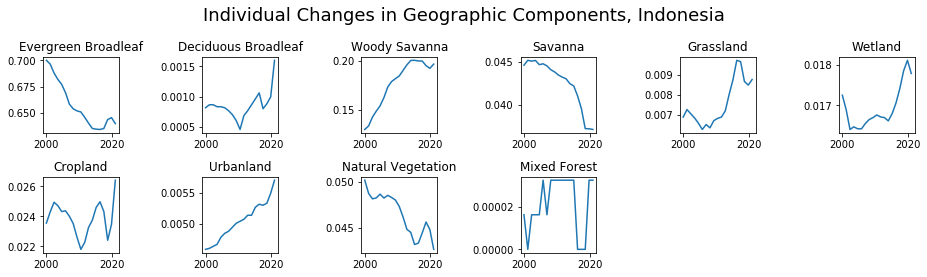

In [68]:
#individual plots with appropriate rates on y axis
x=np.linspace(2000,2021,19)
plt.figure(figsize=(13,4))
plt.subplots_adjust(hspace=0.6, wspace=0.99)
plt.suptitle('Individual Changes in Geographic Components, Indonesia',fontsize=18)
plt.subplot(261)
plt.plot(x, eb_ind_per)
plt.title('Evergreen Broadleaf')
plt.subplot(262)
plt.plot(x, db_ind_per)
plt.title('Deciduous Broadleaf')
plt.subplot(263)
plt.plot(x, ws_ind_per)
plt.title('Woody Savanna')
plt.subplot(264)
plt.plot(x, s_ind_per)
plt.title('Savanna')
plt.subplot(265)
plt.plot(x, gl_ind_per)
plt.title('Grassland')
plt.subplot(266)
plt.plot(x, pw_ind_per)
plt.title('Wetland')
plt.subplot(267)
plt.plot(x, cl_ind_per)
plt.title('Cropland')
plt.subplot(268)
plt.plot(x, ul_ind_per)
plt.title('Urbanland')
plt.subplot(269)
plt.plot(x, nv_ind_per)
plt.title('Natural Vegetation')
plt.subplot(2,6,10)
plt.plot(x, mf_ind_per)
plt.title('Mixed Forest')
plt.tight_layout(rect=[0, 0.03, 1, .9])
plt.show()


In [69]:

#finding difference between first year of study and last year of study

ind_SA_km=np.sum(area[m_ind])

class_types = ['evergreen broadleaf', 'evergreen needleleaf','deciduous needleleaf' ,  'deciduous broadleaf',
               'mixed forest', 'closed shrubland', 'open shrubland', 'woody savanna', 'savanna',
               'grasslands', 'wetlands', 'croplands', 'urbanland', 'natrual vegetation']
ind_change =[]

#difference between 2000 and 2019 for all land cover types in km^2
for k in ind_percents:
    change = (k[-1] - k[0])* ind_SA_km
    ind_change.append(change)
    

for i in range(0,14):
     print("Total difference for",class_types[i], ':%0.2f' %ind_change[i], 'squared kilometers.' )


Total difference for evergreen broadleaf :-114048.46 squared kilometers.
Total difference for evergreen needleleaf :0.00 squared kilometers.
Total difference for deciduous needleleaf :0.00 squared kilometers.
Total difference for deciduous broadleaf :1480.75 squared kilometers.
Total difference for mixed forest :30.85 squared kilometers.
Total difference for closed shrubland :0.00 squared kilometers.
Total difference for open shrubland :0.00 squared kilometers.
Total difference for woody savanna :126110.39 squared kilometers.
Total difference for savanna :-14128.81 squared kilometers.
Total difference for grasslands :3547.63 squared kilometers.
Total difference for wetlands :1018.01 squared kilometers.
Total difference for croplands :5398.56 squared kilometers.
Total difference for urbanland :2128.58 squared kilometers.
Total difference for natrual vegetation :-14067.11 squared kilometers.


In [76]:
#this cell used for finding percentage ratios or measurements amount in writeup

1018/ind_SA_km #percent of new cropland comparative to total surface area
#print(eb_ind_per*ind_SA_km)
#print(db_ind_per*ind_SA_km)

print(ul_ind_per[-1]-ul_ind_per[0])
print(ind_SA_km)

0.0011283544013998134
1886442.3907468999


# Malaysia 
Created only for comparison of Mixed Forest issue in Indonesia

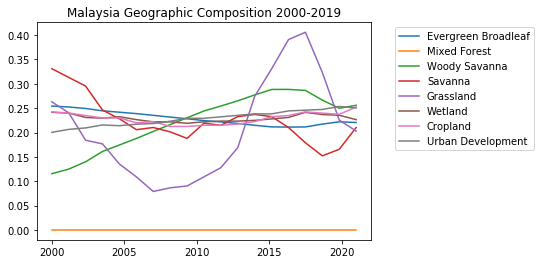

In [87]:
#Malaysia
m_mal = shapedata== 228


eb_mal =[]
for x in EB_mask:
    tmp=np.sum(x[m_mal])
    eb_mal.append(tmp)
    
en_mal =[]
for x in EN_mask:
    tmp=np.sum(x[m_mal])
    en_mal.append(tmp)

dn_mal =[]
for x in DN_mask:
    tmp=np.sum(x[m_mal])
    dn_mal.append(tmp)
    
db_mal =[]
for x in DB_mask:
    tmp=np.sum(x[m_mal])
    db_mal.append(tmp)
    
mf_mal =[]
for x in MF_mask:
    tmp=np.sum(x[m_mal])
    mf_mal.append(tmp)
    
cs_mal =[]
for x in CS_mask:
    tmp=np.sum(x[m_mal])
    cs_mal.append(tmp)
    
os_mal =[]
for x in OS_mask:
    tmp=np.sum(x[m_mal])
    os_mal.append(tmp)
    
ws_mal =[]   
for x in WS_mask:
    tmp=np.sum(x[m_mal])
    ws_mal.append(tmp)
    
s_mal =[]
for x in S_mask:
    tmp=np.sum(x[m_mal])
    s_mal.append(tmp)
    
    
gl_mal =[]
for x in GL_mask:
    tmp=np.sum(x[m_mal])
    gl_mal.append(tmp)

    
    
pw_mal =[]
for x in PW_mask:
    tmp=np.sum(x[m_mal])
    pw_mal.append(tmp)
        
    
cl_mal = []
for x in CL_mask:    
    tmp=np.sum(x[m_mal])
    cl_mal.append(tmp)
    
ul_mal=[]
for x in UL_mask:    
    tmp=np.sum(x[m_mal])
    ul_mal.append(tmp)
    
nv_mal = []
for x in NV_mask:
    tmp=np.sum(x[m_mal])
    nv_mal.append(tmp)
    

        
    
#percent ratio  
en_mal_per = en_mal/(np.sum(m_mal))
eb_mal_per = eb_mal/(np.sum(m_mal))
dn_mal_per = dn_mal/(np.sum(m_mal))
db_mal_per = db_mal/(np.sum(m_mal))
mf_mal_per = mf_mal/(np.sum(m_mal))
cs_mal_per = cs_mal/(np.sum(m_mal))
os_mal_per = os_mal/(np.sum(m_mal))
ws_mal_per = ws_mal/(np.sum(m_mal))
s_mal_per = s_mal/(np.sum(m_mal))
gl_mal_per = gl_mal/(np.sum(m_mal))
pw_mal_per = pw_mal/(np.sum(m_mal))
cl_mal_per = cl_mal/(np.sum(m_mal))
ul_mal_per= ul_mal/(np.sum(m_mal))
nv_mal_per = nv_mal/(np.sum(m_mal))

from sklearn import preprocessing
mal_percents = [eb_mal_per, en_mal_per, dn_mal_per, db_mal_per, mf_mal_per, cs_mal_per, os_mal_per,
                  ws_mal_per, s_mal_per, gl_mal_per, pw_mal_per, cl_mal_per, ul_mal_per, nv_mal_per]
mal_norms = []
for i in mal_percents:
    i = i.reshape(-1,1)
    i = preprocessing.normalize(i,axis = 0)
    mal_norms.append(i)
    
x=np.linspace(2000,2021,19)
plt.plot(x, mal_norms[0],label='Evergreen Broadleaf')
#plt.plot(x, mal_norms[1], label = 'Evergreen Needleleaf')
#plt.plot(x, mal_norms[2], label = 'Deciduous Needleleaf')
#plt.plot(x, mal_norms[3], label = 'Deciduous Broadleaf')
plt.plot(x, mal_norms[4], label = 'Mixed Forest')
#plt.plot(x, mal_norms[5], label = 'Closed Shrubland')
#plt.plot(x, mal_norms[6], label = 'Open Shrubland')
plt.plot(x, mal_norms[7], label = 'Woody Savanna')
plt.plot(x, mal_norms[8], label = 'Savanna')
plt.plot(x, mal_norms[9], label = 'Grassland')
plt.plot(x, mal_norms[10], label = 'Wetland')
plt.plot(x, mal_norms[11], label='Cropland')
plt.plot(x, mal_norms[12], label = 'Urban Development')
plt.title('Malaysia Geographic Composition 2000-2019')
plt.legend(loc='upper right',bbox_to_anchor= (1.5,1))
plt.show()


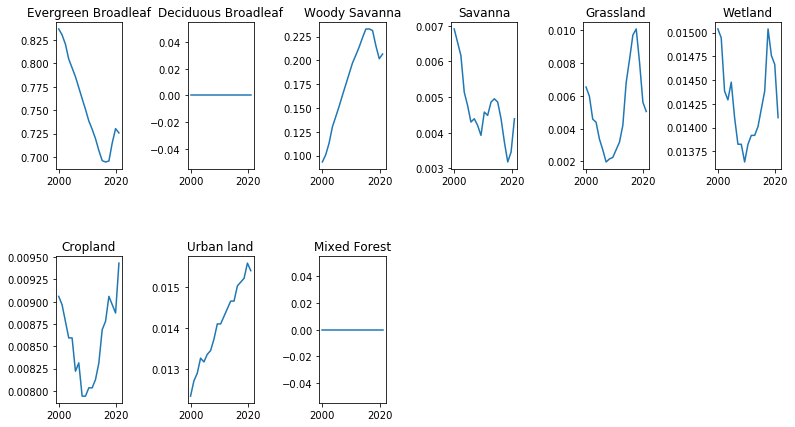

In [86]:
x=np.linspace(2000,2021,19)
plt.figure(figsize=(13,7))
plt.subplots_adjust(hspace=0.6, wspace=0.99)

plt.subplot(261)
plt.plot(x, eb_mal_per)
plt.title('Evergreen Broadleaf')
plt.subplot(262)
plt.plot(x, db_mal_per)
plt.title('Deciduous Broadleaf')
plt.subplot(263)
plt.plot(x, ws_mal_per)
plt.title('Woody Savanna')
plt.subplot(264)
plt.plot(x, s_mal_per)
plt.title('Savanna')
plt.subplot(265)
plt.plot(x, gl_mal_per)
plt.title('Grassland')
plt.subplot(266)
plt.plot(x, pw_mal_per)
plt.title('Wetland')
plt.subplot(267)
plt.plot(x, cl_mal_per)
plt.title('Cropland')
plt.subplot(268)
plt.plot(x, ul_mal_per)
plt.title('Urban land')
plt.subplot(269)
plt.plot(x, mf_mal_per)
plt.title('Mixed Forest')
plt.show()


# Switching focus onto world sums...

Creating respective masks for each iteration over every year. In the end will have 10 Lists, with 19 components. These masks consist of the total summed area of the appropriate indicies for the given year.

In [90]:
#2019

class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']


forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask_19 = data19 == i
    mask=np.sum(area[mask_19])
    all_masks=np.append(all_masks, mask)
    
# print(mask_19.shape)
# print("Summed areas for 2019")
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN19 = all_masks[0]
EB19 = all_masks[1]
DN19 = all_masks[2]
DB19 = all_masks[3]
MF19 = all_masks[4]
S19 = all_masks[5]
GL19 = all_masks[6]
CL19 = all_masks[7]
UL19 = all_masks[8]
NV19 = all_masks[9]
UC19 = all_masks[10]



Total surface area for evergreen needleleaf :2277965.35 squared kilometers.
Total surface area for evergreen broadleaf :12500044.82 squared kilometers.
Total surface area for deciduous needleleaf :242871.19 squared kilometers.
Total surface area for deciduous broadleaf :2640813.30 squared kilometers.
Total surface area for mixed forests :4818302.10 squared kilometers.
Total surface area for savannas :16556777.67 squared kilometers.
Total surface area for grasslands :30612428.13 squared kilometers.
Total surface area for croplands :12341495.65 squared kilometers.


In [91]:
#2018

class_types = ['evergreen needleleaf', 'evergreen broadleaf',
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']


forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask_i = data18 == i
    mask=np.sum(area[mask_i])
    all_masks=np.append(all_masks, mask)
#print(all_masks)

# print("Summed areas for 2018")
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN18 = all_masks[0]
EB18 = all_masks[1]
DN18 = all_masks[2]
DB18 = all_masks[3]
MF18 = all_masks[4]
S18 = all_masks[5]
GL18 = all_masks[6]
CL18 = all_masks[7]
UL18 = all_masks[8]
NV18 = all_masks[9]
UC18 = all_masks[10]

Total surface area for evergreen needleleaf :2311847.32 squared kilometers.
Total surface area for evergreen broadleaf :12545945.19 squared kilometers.
Total surface area for deciduous needleleaf :237867.19 squared kilometers.
Total surface area for deciduous broadleaf :2661598.06 squared kilometers.
Total surface area for mixed forests :4863832.19 squared kilometers.
Total surface area for savannas :16611106.85 squared kilometers.
Total surface area for grasslands :30565002.88 squared kilometers.
Total surface area for croplands :12284874.39 squared kilometers.


In [92]:
#2017

class_types = ['evergreen needleleaf', 'evergreen broadleaf',
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data17 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)
#print(all_masks)

# print('Summed areas for 2017')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN17 = all_masks[0]
EB17 = all_masks[1]
DN17 = all_masks[2]
DB17 = all_masks[3]
MF17 = all_masks[4]
S17 = all_masks[5]
GL17 = all_masks[6]
CL17 = all_masks[7]
UL17 = all_masks[8]
NV17 = all_masks[9]
UC17 = all_masks[10]

Total surface area for evergreen needleleaf :2353590.30 squared kilometers.
Total surface area for evergreen broadleaf :12500732.26 squared kilometers.
Total surface area for deciduous needleleaf :230820.72 squared kilometers.
Total surface area for deciduous broadleaf :2707878.64 squared kilometers.
Total surface area for mixed forests :4898462.27 squared kilometers.
Total surface area for savannas :16641171.65 squared kilometers.
Total surface area for grasslands :30597351.49 squared kilometers.
Total surface area for croplands :12334930.86 squared kilometers.


In [93]:
#2016

class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data16 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)
#print(all_masks)

# print('Summed areas for 2016')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN16 = all_masks[0]
EB16 = all_masks[1]
DN16 = all_masks[2]
DB16 = all_masks[3]
MF16 = all_masks[4]
S16 = all_masks[5]
GL16 = all_masks[6]
CL16 = all_masks[7]
UL16 = all_masks[8]
NV16 = all_masks[9]
UC16 = all_masks[10]

Total surface area for evergreen needleleaf :2376408.92 squared kilometers.
Total surface area for evergreen broadleaf :12451874.79 squared kilometers.
Total surface area for deciduous needleleaf :248558.79 squared kilometers.
Total surface area for deciduous broadleaf :2710033.73 squared kilometers.
Total surface area for mixed forests :4861735.05 squared kilometers.
Total surface area for savannas :16498683.96 squared kilometers.
Total surface area for grasslands :30613858.80 squared kilometers.
Total surface area for croplands :12366920.15 squared kilometers.


In [109]:
#2015

class_types = ['evergreen needleleaf', 'evergreen broadleaf',
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations','UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data15 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)
#print(all_masks)

# print('Summed areas for 2015')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN15 = all_masks[0]
EB15 = all_masks[1]
DN15 = all_masks[2]
DB15 = all_masks[3]
MF15 = all_masks[4]
S15 = all_masks[5]
GL15 = all_masks[6]
CL15 = all_masks[7]
UL15 = all_masks[8]
NV15 = all_masks[9]
UC15 = all_masks[10]

Total surface area for evergreen needleleaf :2402547.84 squared kilometers.
Total surface area for evergreen broadleaf :12461406.24 squared kilometers.
Total surface area for deciduous needleleaf :261541.31 squared kilometers.
Total surface area for deciduous broadleaf :2702319.71 squared kilometers.
Total surface area for mixed forests :4841386.01 squared kilometers.
Total surface area for savannas :16572890.64 squared kilometers.
Total surface area for grasslands :30604651.49 squared kilometers.
Total surface area for croplands :12348507.18 squared kilometers.


In [94]:
#2014

class_types = ['evergreen needleleaf', 'evergreen broadleaf',
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations','UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data14 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)
#print(all_masks)

# print('Summed areas for 2014')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN14 = all_masks[0]
EB14 = all_masks[1]
DN14 = all_masks[2]
DB14 = all_masks[3]
MF14 = all_masks[4]
S14 = all_masks[5]
GL14 = all_masks[6]
CL14 = all_masks[7]
UL14 = all_masks[8]
NV14 = all_masks[9]
UC14 = all_masks[10]

Total surface area for evergreen needleleaf :2425072.76 squared kilometers.
Total surface area for evergreen broadleaf :12446998.34 squared kilometers.
Total surface area for deciduous needleleaf :273296.28 squared kilometers.
Total surface area for deciduous broadleaf :2698694.29 squared kilometers.
Total surface area for mixed forests :4807890.73 squared kilometers.
Total surface area for savannas :16648690.28 squared kilometers.
Total surface area for grasslands :30580364.07 squared kilometers.
Total surface area for croplands :12336998.23 squared kilometers.


In [95]:
#2013
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data13 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2013')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN13 = all_masks[0]    
EB13 = all_masks[1]
DN13 = all_masks[2]
DB13 = all_masks[3]
MF13 = all_masks[4]
S13 = all_masks[5]
GL13 = all_masks[6]
CL13 = all_masks[7]
UL13 = all_masks[8]
NV13 = all_masks[9]
UC13 = all_masks[10]

Total surface area for evergreen needleleaf :2429984.55 squared kilometers.
Total surface area for evergreen broadleaf :12456554.79 squared kilometers.
Total surface area for deciduous needleleaf :298309.96 squared kilometers.
Total surface area for deciduous broadleaf :2700673.53 squared kilometers.
Total surface area for mixed forests :4773483.98 squared kilometers.
Total surface area for savannas :16645034.30 squared kilometers.
Total surface area for grasslands :30636681.19 squared kilometers.
Total surface area for croplands :12315802.25 squared kilometers.


In [96]:
#2012
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data12 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2012')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN12 = all_masks[0]        
EB12 = all_masks[1]
DN12 = all_masks[2]
DB12 = all_masks[3]
MF12 = all_masks[4]
S12 = all_masks[5]
GL12 = all_masks[6]
CL12 = all_masks[7]
UL12 = all_masks[8]
NV12 = all_masks[9]
UC12 = all_masks[10]

Total surface area for evergreen needleleaf :2434186.09 squared kilometers.
Total surface area for evergreen broadleaf :12483442.38 squared kilometers.
Total surface area for deciduous needleleaf :314670.86 squared kilometers.
Total surface area for deciduous broadleaf :2707403.12 squared kilometers.
Total surface area for mixed forests :4737699.58 squared kilometers.
Total surface area for savannas :16619684.53 squared kilometers.
Total surface area for grasslands :30714881.23 squared kilometers.
Total surface area for croplands :12265056.28 squared kilometers.


In [97]:
#2011
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations', 'UC']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data11 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2011')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN11 = all_masks[0]    
EB11 = all_masks[1]
DN11 = all_masks[2]
DB11 = all_masks[3]
MF11 = all_masks[4]
S11 = all_masks[5]
GL11 = all_masks[6]
CL11 = all_masks[7]
UL11 = all_masks[8]
NV11 = all_masks[9]
UC11 = all_masks[10]

Total surface area for evergreen needleleaf :2429513.91 squared kilometers.
Total surface area for evergreen broadleaf :12506046.96 squared kilometers.
Total surface area for deciduous needleleaf :332329.69 squared kilometers.
Total surface area for deciduous broadleaf :2753765.80 squared kilometers.
Total surface area for mixed forests :4710555.27 squared kilometers.
Total surface area for savannas :16593817.39 squared kilometers.
Total surface area for grasslands :30736690.08 squared kilometers.
Total surface area for croplands :12264875.66 squared kilometers.


In [98]:
#2010
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data10 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2010')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN10 = all_masks[0]    
EB10 = all_masks[1]
DN10 = all_masks[2]
DB10 = all_masks[3]
MF10 = all_masks[4]
S10 = all_masks[5]
GL10 = all_masks[6]
CL10 = all_masks[7]
UL10= all_masks[8]
NV10= all_masks[9]
UC10 = all_masks[10]

Total surface area for evergreen needleleaf :2419604.52 squared kilometers.
Total surface area for evergreen broadleaf :12524941.82 squared kilometers.
Total surface area for deciduous needleleaf :337145.94 squared kilometers.
Total surface area for deciduous broadleaf :2771081.62 squared kilometers.
Total surface area for mixed forests :4691936.21 squared kilometers.
Total surface area for savannas :16599534.43 squared kilometers.
Total surface area for grasslands :30724644.98 squared kilometers.
Total surface area for croplands :12285550.92 squared kilometers.


In [99]:
#2009
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data9 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2009')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN9 = all_masks[0]    
EB9 = all_masks[1]
DN9 = all_masks[2]
DB9 = all_masks[3]
MF9 = all_masks[4]
S9= all_masks[5]
GL9 = all_masks[6]
CL9 = all_masks[7]
UL9 = all_masks[8]
NV9 = all_masks[9]
UC9 = all_masks[10]

Total surface area for evergreen needleleaf :2402597.70 squared kilometers.
Total surface area for evergreen broadleaf :12550807.49 squared kilometers.
Total surface area for deciduous needleleaf :327224.88 squared kilometers.
Total surface area for deciduous broadleaf :2771768.25 squared kilometers.
Total surface area for mixed forests :4677197.34 squared kilometers.
Total surface area for savannas :16611277.15 squared kilometers.
Total surface area for grasslands :30693808.82 squared kilometers.
Total surface area for croplands :12249024.08 squared kilometers.


In [100]:
#2008
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data8 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2008')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN8 = all_masks[0]    
EB8 = all_masks[1]
DN8 = all_masks[2]
DB8 = all_masks[3]
MF8 = all_masks[4]
S8 = all_masks[5]
GL8 = all_masks[6]
CL8 = all_masks[7]
UL8 = all_masks[8]
NV8 = all_masks[9]
UC8 = all_masks[10]

Total surface area for evergreen needleleaf :2387164.89 squared kilometers.
Total surface area for evergreen broadleaf :12587527.60 squared kilometers.
Total surface area for deciduous needleleaf :318754.71 squared kilometers.
Total surface area for deciduous broadleaf :2759367.17 squared kilometers.
Total surface area for mixed forests :4659428.87 squared kilometers.
Total surface area for savannas :16612537.21 squared kilometers.
Total surface area for grasslands :30685760.43 squared kilometers.
Total surface area for croplands :12238500.54 squared kilometers.


In [101]:
#2007
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data7 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2007')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN7 = all_masks[0]    
EB7 = all_masks[1]
DN7 = all_masks[2]
DB7 = all_masks[3]
MF7 = all_masks[4]
S7 = all_masks[5]
GL7 = all_masks[6]
CL7 = all_masks[7]
UL7 = all_masks[8]
NV7 = all_masks[9]
UC7 = all_masks[10]

Total surface area for evergreen needleleaf :2377270.19 squared kilometers.
Total surface area for evergreen broadleaf :12637608.91 squared kilometers.
Total surface area for deciduous needleleaf :311402.68 squared kilometers.
Total surface area for deciduous broadleaf :2748034.85 squared kilometers.
Total surface area for mixed forests :4648022.43 squared kilometers.
Total surface area for savannas :16621282.36 squared kilometers.
Total surface area for grasslands :30673550.59 squared kilometers.
Total surface area for croplands :12221508.26 squared kilometers.


In [102]:
#2006
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data6 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2006')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN6 = all_masks[0]    
EB6 = all_masks[1]
DN6 = all_masks[2]
DB6 = all_masks[3]
MF6 = all_masks[4]
S6 = all_masks[5]
GL6 = all_masks[6]
CL6 = all_masks[7]
UL6 = all_masks[8]
NV6 = all_masks[9]
UC6 = all_masks[10]

Total surface area for evergreen needleleaf :2359155.80 squared kilometers.
Total surface area for evergreen broadleaf :12711931.88 squared kilometers.
Total surface area for deciduous needleleaf :308144.16 squared kilometers.
Total surface area for deciduous broadleaf :2743214.21 squared kilometers.
Total surface area for mixed forests :4629603.37 squared kilometers.
Total surface area for savannas :16646618.22 squared kilometers.
Total surface area for grasslands :30677877.41 squared kilometers.
Total surface area for croplands :12206595.33 squared kilometers.


In [103]:
#2005
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14, 255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data5 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2005')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN5 = all_masks[0]    
EB5 = all_masks[1]
DN5 = all_masks[2]
DB5 = all_masks[3]
MF5 = all_masks[4]
S5 = all_masks[5]
GL5 = all_masks[6]
CL5 = all_masks[7]
UL5 = all_masks[8]
NV5 = all_masks[9]
UC5 = all_masks[10]

Total surface area for evergreen needleleaf :2354949.10 squared kilometers.
Total surface area for evergreen broadleaf :12790620.77 squared kilometers.
Total surface area for deciduous needleleaf :300680.69 squared kilometers.
Total surface area for deciduous broadleaf :2747244.55 squared kilometers.
Total surface area for mixed forests :4627756.91 squared kilometers.
Total surface area for savannas :16632744.06 squared kilometers.
Total surface area for grasslands :30632688.85 squared kilometers.
Total surface area for croplands :12219397.07 squared kilometers.


In [104]:
#2004
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data4 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2009')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN4 = all_masks[0]    
EB4 = all_masks[1]
DN4 = all_masks[2]
DB4 = all_masks[3]
MF4 = all_masks[4]
S4 = all_masks[5]
GL4 = all_masks[6]
CL4 = all_masks[7]
UL4 = all_masks[8]
NV4 = all_masks[9]
UC4 = all_masks[10]

Total surface area for evergreen needleleaf :2346852.06 squared kilometers.
Total surface area for evergreen broadleaf :12860612.38 squared kilometers.
Total surface area for deciduous needleleaf :285642.91 squared kilometers.
Total surface area for deciduous broadleaf :2732152.60 squared kilometers.
Total surface area for mixed forests :4631231.13 squared kilometers.
Total surface area for savannas :16642920.79 squared kilometers.
Total surface area for grasslands :30567947.65 squared kilometers.
Total surface area for croplands :12245476.40 squared kilometers.


In [105]:
#2003
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data3 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2009')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN3 = all_masks[0]    
EB3 = all_masks[1]
DN3 = all_masks[2]
DB3 = all_masks[3]
MF3 = all_masks[4]
S3 = all_masks[5]
GL3 = all_masks[6]
CL3 = all_masks[7]
UL3 = all_masks[8]
NV3 = all_masks[9]
UC3 = all_masks[10]

Total surface area for evergreen needleleaf :2357992.76 squared kilometers.
Total surface area for evergreen broadleaf :12936746.72 squared kilometers.
Total surface area for deciduous needleleaf :268492.70 squared kilometers.
Total surface area for deciduous broadleaf :2687292.91 squared kilometers.
Total surface area for mixed forests :4628155.58 squared kilometers.
Total surface area for savannas :16695437.77 squared kilometers.
Total surface area for grasslands :30493894.64 squared kilometers.
Total surface area for croplands :12251705.95 squared kilometers.


In [106]:
#2002
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data2 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2009')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN2 = all_masks[0]    
EB2 = all_masks[1]
DN2 = all_masks[2]
DB2 = all_masks[3]
MF2 = all_masks[4]
S2 = all_masks[5]
GL2 = all_masks[6]
CL2 = all_masks[7]
UL2 = all_masks[8]
NV2 = all_masks[9]
UC2 = all_masks[10]

Total surface area for evergreen needleleaf :2399722.58 squared kilometers.
Total surface area for evergreen broadleaf :13037435.69 squared kilometers.
Total surface area for deciduous needleleaf :268697.15 squared kilometers.
Total surface area for deciduous broadleaf :2680444.03 squared kilometers.
Total surface area for mixed forests :4668767.45 squared kilometers.
Total surface area for savannas :16781246.05 squared kilometers.
Total surface area for grasslands :30372635.73 squared kilometers.
Total surface area for croplands :12153035.48 squared kilometers.


In [107]:
#2001
class_types = ['evergreen needleleaf', 'evergreen broadleaf', 
               'deciduous needleleaf', 'deciduous broadleaf', 'mixed forests', 'savannas', 'grasslands',
               'croplands', 'urban lands', 'natrual vegetations']

forest_crop_indices = [1,2,3,4,5,9,10, 12, 13, 14,255]

#for title in class_types:
all_masks= []
for i in forest_crop_indices:
    mask = data1 == i
    mask=np.sum(area[mask])
    all_masks=np.append(all_masks, mask)

# print('Summed areas for 2009')
for i in range(0,8):
    print("Total surface area for",class_types[i], ':%0.2f' %all_masks[i], 'squared kilometers.' )

EN1 = all_masks[0]    
EB1 = all_masks[1]
DN1 = all_masks[2]
DB1 = all_masks[3]
MF1 = all_masks[4]
S1 = all_masks[5]
GL1 = all_masks[6]
CL1 = all_masks[7]
UL1 = all_masks[8]
NV1 = all_masks[9]
UC1 = all_masks[10]

Total surface area for evergreen needleleaf :2434648.69 squared kilometers.
Total surface area for evergreen broadleaf :13059434.25 squared kilometers.
Total surface area for deciduous needleleaf :273637.68 squared kilometers.
Total surface area for deciduous broadleaf :2662432.28 squared kilometers.
Total surface area for mixed forests :4685919.74 squared kilometers.
Total surface area for savannas :16833165.00 squared kilometers.
Total surface area for grasslands :30254232.49 squared kilometers.
Total surface area for croplands :12072231.11 squared kilometers.


## Gather all masks to lists

In [110]:
all_EN = [EN1, EN2, EN3, EN4, EN5, EN6, EN7, EN8, EN9, EN10,EN11, EN12, EN13, EN14, EN15, EN16, EN17, EN18, EN19]
all_EB = [EB1, EB2, EB3, EB4, EB5, EB6, EB7, EB8, EB9, EB10, EB11, EB12, EB13, EB14, EB15, EB16, EB17, EB18, EB19]
all_DN = [DN1, DN2, DN3, DN4, DN5, DN6, DN7, DN8, DN9, DN10, DN11, DN12, DN13, DN14, DN15, DN16, DN17, DN18, DN19]
all_DB = [DB1, DB2, DB3, DB4, DB5, DB6, DB7, DB8, DB9, DB10, DB11, DB12, DB13, DB14, DB15, DB16, DB17, DB18, DB19]
all_MF = [MF1, MF2, MF3, MF4, MF5, MF6, MF7, MF8, MF9, MF10, MF11, MF12, MF13, MF14, MF15, MF16, MF17, MF18, MF19]
all_CL = [CL1, CL2, CL3, CL4, CL5, CL6, CL7, CL8, CL9, CL10, CL11, CL12, CL13, CL14, CL15, CL16, CL17, CL18, CL19]
all_UL = [UL1, UL2, UL3, UL4, UL5, UL6, UL7, UL8, UL9, UL10, UL11, UL12, UL13, UL14, UL15, UL16, UL17, UL18, UL19]
all_NV = [NV1, NV2, NV3, NV4, NV5, NV6, NV7, NV8, NV9, NV10, NV11, NV12, NV13, NV14, NV15, NV16, NV17, NV18, NV19]
all_S = [S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15, S16, S17, S18, S19]
all_GL = [GL1, GL2, GL3, GL4, GL5, GL6, GL7, GL8, GL9, GL10, GL11, GL12, GL13, GL14, GL15, GL16, GL17, GL18, GL19]
all_UC = [UC1, UC2, UC3, UC4, UC5, UC6, UC7, UC8, UC9, UC10, UC11, UC12, UC13, UC14, UC15, UC16, UC17, UC18, UC19]



# Plot

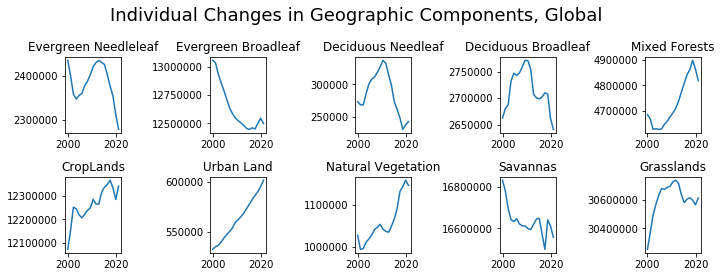

In [111]:
x=np.linspace(2000,2021,19)


plt.figure(figsize=(10,4))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Individual Changes in Geographic Components, Global',fontsize=18)

plt.subplot(251)
plt.plot(x, all_EN)
plt.title('Evergreen Needleleaf')


plt.subplot(252)
plt.plot(x, all_EB)
plt.ticklabel_format(style = 'plain')
plt.title('Evergreen Broadleaf')
plt.subplot(253)
plt.plot(x, all_DN)
plt.title('Deciduous Needleaf')

plt.subplot(254)
plt.plot(x, all_DB)
plt.title('Deciduous Broadleaf')

plt.subplot(255)
plt.plot(x, all_MF)
plt.title('Mixed Forests')

plt.subplot(256)
plt.plot(x, all_CL)
plt.ticklabel_format(style = 'plain')
plt.title('CropLands')

plt.subplot(257)
plt.plot(x, all_UL)
plt.title('Urban Land')

plt.subplot(258)
plt.plot(x, all_NV)
plt.title('Natural Vegetation')

plt.subplot(259)
plt.plot(x, all_S)
plt.ticklabel_format(style = 'plain')
plt.title('Savannas')

plt.subplot(2,5,10)
plt.plot(x, all_GL)
plt.ticklabel_format(style = 'plain')
plt.title('Grasslands')
plt.tight_layout(rect=[0, 0.03, 1, .9])

plt.show()


In [113]:
#caclulating average increaes or decreases
print((all_EB[-1]-all_EB[0])/19) #net change in evergreen broadleaf
print((all_EN[-1]-all_EN[0])/19) #net change in evergreen needleleaf
print((all_DB[-1]-all_DB[0])/19) #net change in deciduous broadleaf
print((all_DN[-1]-all_DN[0])/19)#net change in deciduous needleleaf
print((all_MF[-1]-all_MF[0])/19) #net change in mixed forest
print((all_CL[-1]-all_CL[0])/19) #net change in cropland 
print((all_UL[-1]-all_UL[0])/19) #net change in urband land 
print((all_NV[-1]-all_NV[0])/19) #net change in natural vegetation 
print((all_S[-1]-all_S[0])/19) #net change in savanna 
print((all_GL[-1]-all_GL[0])/19)#net change in grassland 


-29441.5490700728
-8246.49126829327
-1137.8411766104155
-1619.2889327886437
6967.492900565316
14171.81759288162
3662.5612254850626
6228.988887861286
-14546.70163113271
18852.402257765985
